# ACE_krill dataset testing image processing methods

## Data description

Data collected during the Antarctic Circumnavigation Expedition (ACE) in 2017 using an EK80 echosounder running at a frequency of 200 kHz.

## Objective

Extracting the krill parameters

## Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
#import scipy.signal
#import skimage

## Import data



We import the csv file.

In [2]:
data_path = '/home/benjamin/Documents/datascience/ACE/'
df = pd.read_csv(data_path+'ACE_-D20170207-T104031.sv.csv', delimiter=',', skipinitialspace=True)

In [3]:
info_df = df.iloc[:,:13]
data= np.array(df.iloc[:,13:]).transpose()

In [19]:
import ACE_box
import importlib
importlib.reload(ACE_box)

<module 'ACE_box' from '/home/benjamin/Documents/datascience/data jam days/scripts/ACE_box.py'>

In [5]:
data.shape

(2693, 9163)

In [6]:
depth_data = ACE_box.compute_depth_data(df)

Start depth (in meters): 0.09278976
Stop depth (in meters): 499.8584359
Nb of pixels along depth axis: 2693
Depth per pixel (in meters): 0.185579519547


In [7]:
data_trunc = ACE_box.cut_echogram(data,100,depth_data)

In [8]:
data_rescale = ACE_box.fix_contrast(data_trunc)

<IPython.core.display.Javascript object>


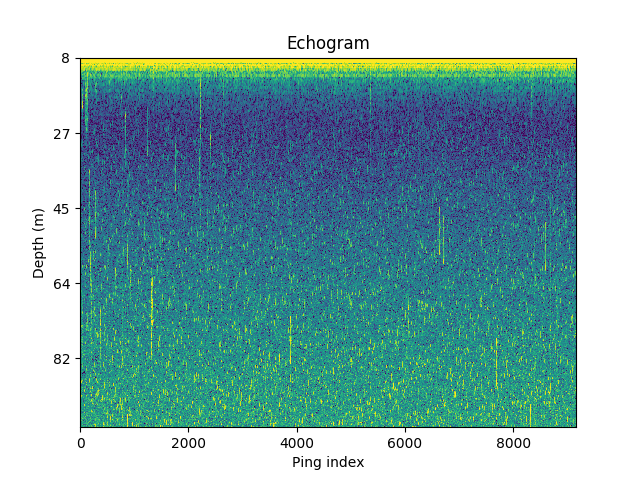

In [9]:
%matplotlib notebook
ACE_box.show_echogram(data_rescale,depth_data)

## Filtering processes

In [10]:
data2 =data_rescale.copy()
#data2[data<-70] = -70
#data2[data>-65] = -65
#data2 = data2 + 70

In [13]:
data3 = ACE_box.remove_vertical_lines(data2)

Number of noisy pixels:  5333


In [14]:
data3 = ACE_box.substract_meanovertime(data3)

In [122]:
import ACE_box
import importlib
importlib.reload(ACE_box)

<module 'ACE_box' from '/home/benjamin/Documents/datascience/data jam days/scripts/ACE_box.py'>

In [123]:
gauss_denoised = ACE_box.gaussian_filter(data3)

### Visualisation of the results of the first filtering processes

<IPython.core.display.Javascript object>


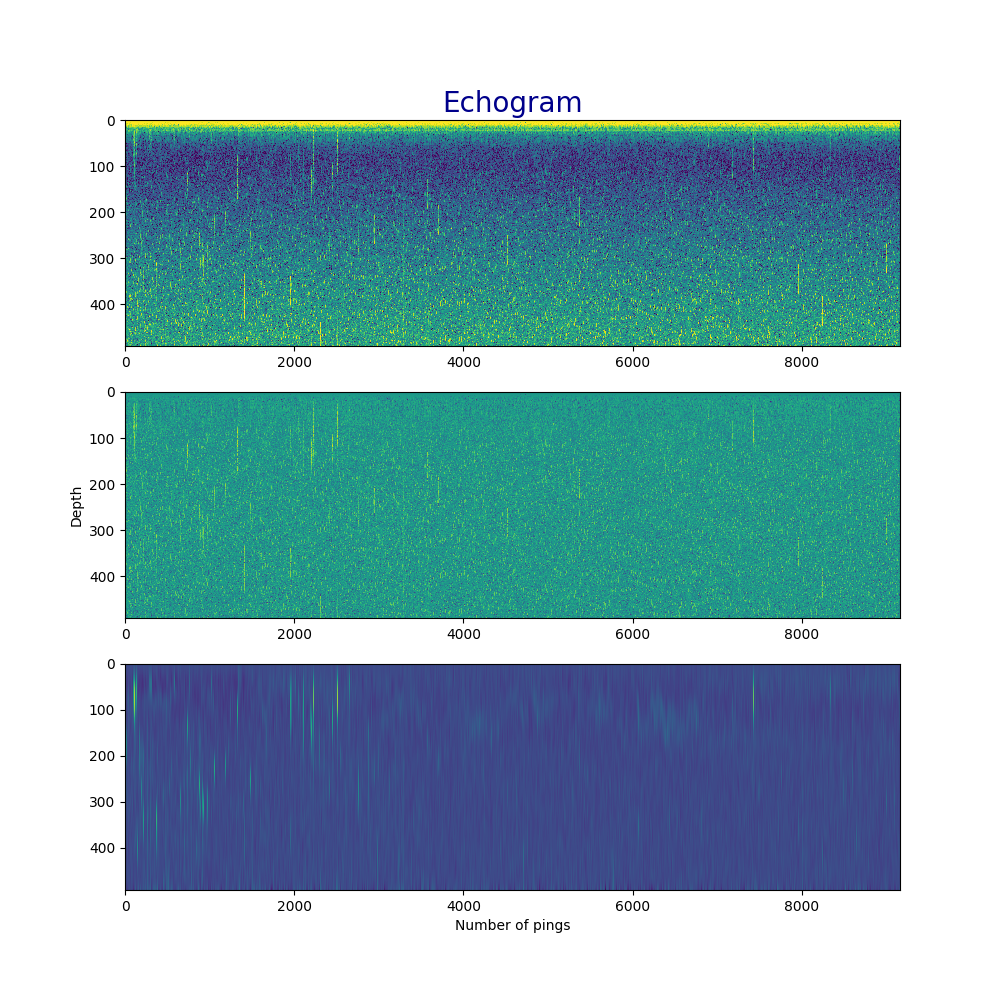

In [124]:
%matplotlib notebook
from matplotlib import pyplot as plt

plt.figure(figsize=(10,10)) 
ax1 = plt.subplot(3,1,1)
ax1.imshow(data2[0:,:],aspect='auto')
plt.title('Echogram',fontsize=20, color="darkblue")
ax2 = plt.subplot(3,1,2, sharex=ax1, sharey=ax1)
ax2.imshow(data3[0:,:],aspect='auto')
plt.ylabel('Depth')
ax3 = plt.subplot(3,1,3, sharex=ax1, sharey=ax1)
ax3.imshow(gauss_denoised[0:,:],aspect='auto')
#ax3.imshow(databi[0:,:],aspect='auto')
plt.xlabel('Number of pings')
plt.show()

We then try to get rid of the remaining background noise by substracting the mean of each line line to every pixel (smoothing).

In [135]:
krillsignal,energy_fluctuation = ACE_box.krill_function(gauss_denoised,1)

<IPython.core.display.Javascript object>


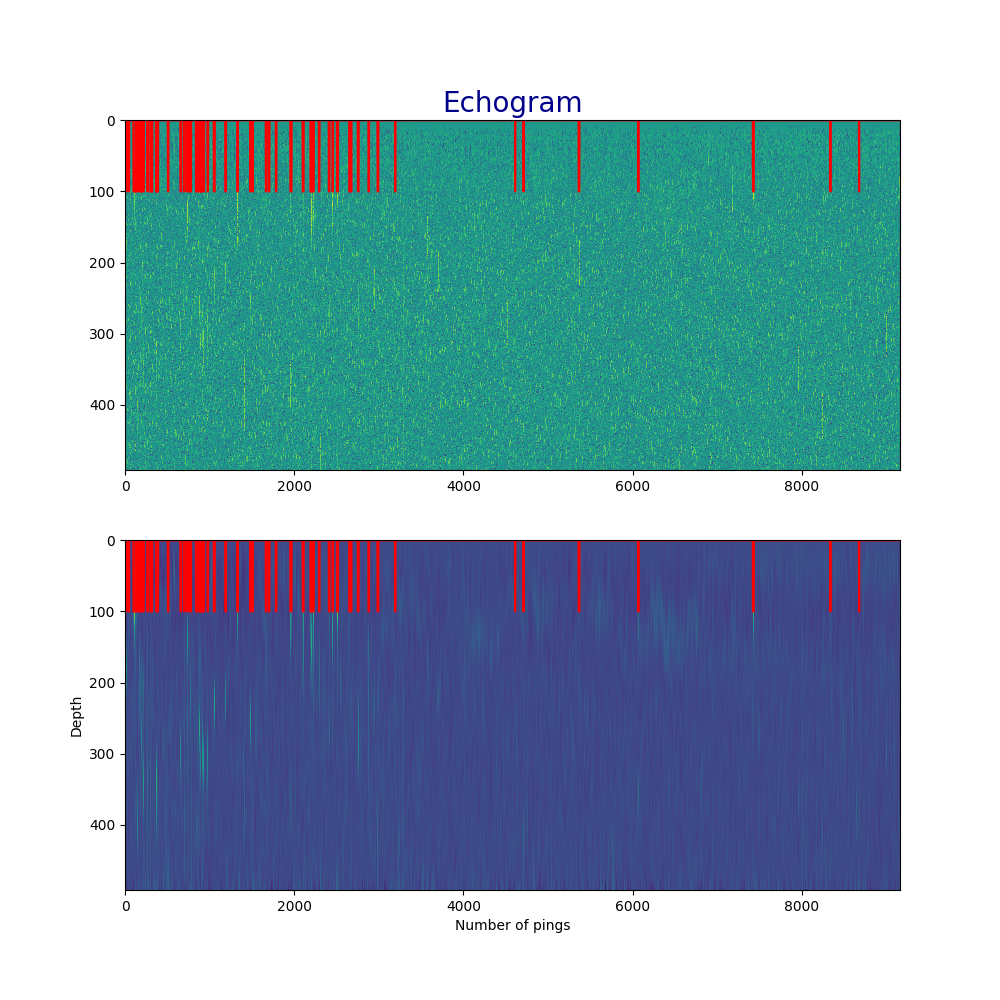

In [136]:
%matplotlib notebook
from matplotlib import pyplot as plt

plt.figure(figsize=(10,10))
ax1 = plt.subplot(2,1,1)
ax1.imshow(data3[0:,:],aspect='auto')
ax1.plot(krillsignal,color='r')
plt.title('Echogram',fontsize=20, color="darkblue")
ax2 = plt.subplot(2,1,2, sharex=ax1, sharey=ax1)
ax2.imshow(gauss_denoised,aspect='auto')
plt.ylabel('Depth')
ax2.plot(krillsignal,color='r')
plt.xlabel('Number of pings')
plt.show()

In [85]:
energy_fluctuation

0.54358662773407662

In [137]:
import ACE_box
import importlib
importlib.reload(ACE_box)

<module 'ACE_box' from '/home/benjamin/Documents/datascience/data jam days/scripts/ACE_box.py'>

In [138]:
kchunks = ACE_box.extract_krillchunks(krillsignal,data3)
kchunks_gauss = ACE_box.extract_krillchunks(krillsignal,gauss_denoised)

In [139]:
print("Nb of chunks: ",len(kchunks))

Nb of chunks:  54


In [140]:
idx = 1
print(kchunks[idx]['Ping_start_index'],kchunks[idx]['Ping_end_index'])
print(kchunks[idx]['data'].shape)

43 47
(492, 5)


<IPython.core.display.Javascript object>


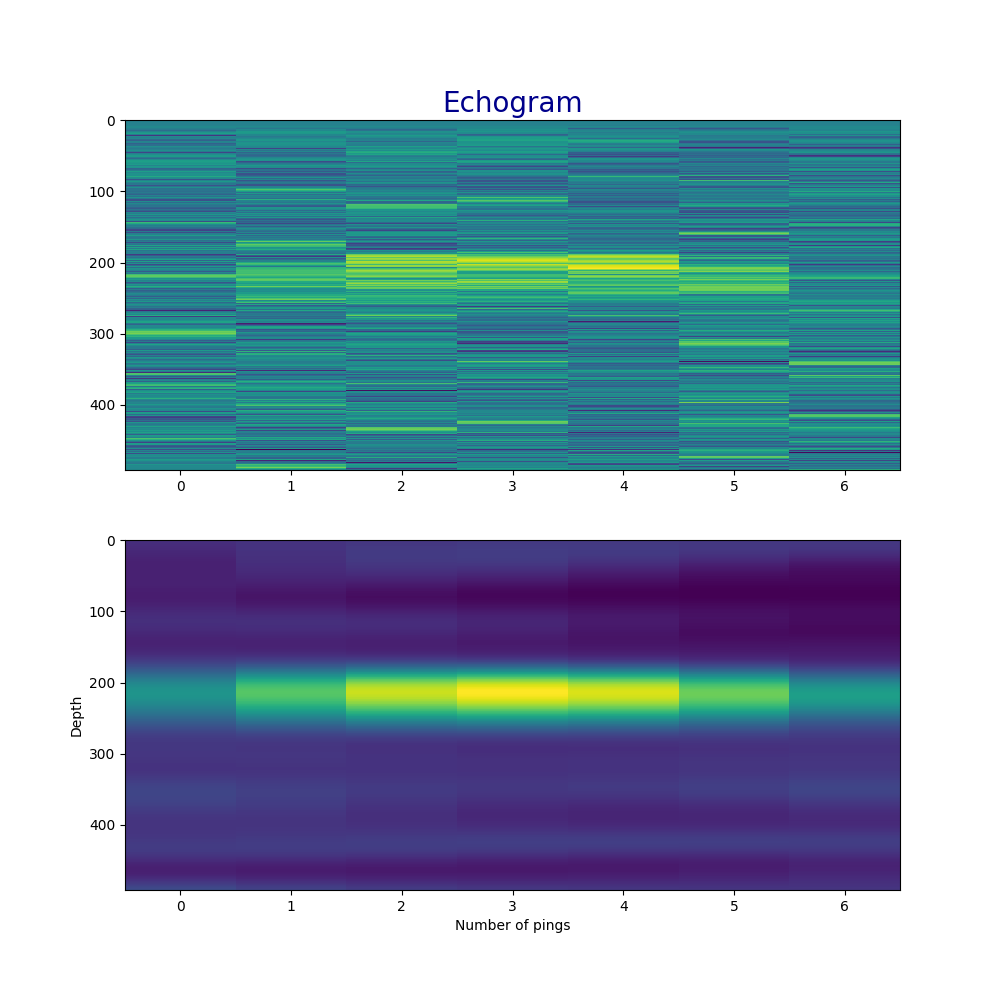

In [145]:
%matplotlib notebook
from matplotlib import pyplot as plt
idx=17
plt.figure(figsize=(10,10))
ax1 = plt.subplot(2,1,1)
ax1.imshow(kchunks[idx]['data'],aspect='auto')
plt.title('Echogram',fontsize=20, color="darkblue")
ax2 = plt.subplot(2,1,2)
ax2.imshow(kchunks_gauss[idx]['data'],aspect='auto')
plt.ylabel('Depth')
plt.xlabel('Number of pings')
plt.show()